# Modified Grover operator for quantum amplitude estimation


## Contributors

Based on the paper [Modified Grover operator for amplitude estimation](https://arxiv.org/abs/2010.11656). 

Shumpei Uno, Yohichi Suzuki, Keigo Hisanaga, Rudy Raymond, Tomoki Tanaka, Tamiya Onodera, and Naoki Yamamoto.


## Summary

This notebook contains experiments for performing amplitude estimation without inverse Quantum Fourier Transform (QFT) and controlled Q-operators (a.k.a. Grover operators).
It is known that without QFT and such controlled operators, the number of two-qubit gates (e.g., CNOT gates) required for running amplitude estimation can be reduced, and hence may be more appropriate to run quantum algorithms on Noisy Intermediate Scale Quantum (NISQ) devices.
Here, the Grover operator used here is the modified one provided by the paper above, which would reach the higher accuracy under the depolarization error.

## Modified Amplitude Amplification Operator

### Operator

The modified amplitude amplification operator is defined as:
$$Q=U_{0} A^{\dagger} U_{f} A$$
while the conventional amplitude amplification operator is like:
$$G=A U_{0} A^{\dagger} U_{f}$$

### Result after $m$ Iterations
Application of $Q^m$ on the initial
state $\left|0\right>^{n+1}$ produces
\begin{eqnarray}
\left|\psi_{Q}\left(\theta, N_{\mathrm{q}}\right)\right\rangle:=Q^{m}|0\rangle_{n+1}=\cos \left(N_{\mathrm{q}} \theta\right)|0\rangle_{n+1}+\sin \left(N_{\mathrm{q}} \theta\right)|\phi\rangle_{n+1}
\end{eqnarray}
where
\begin{eqnarray}
\begin{aligned}
|\phi\rangle_{n+1} &=A^{\dagger}\left(-\sin \theta\left|\psi_{0}\right\rangle_{n}|0\rangle+\cos \theta\left|\psi_{1}\right\rangle_{n}|1\rangle\right) \\
&=\frac{1}{\sin 2 \theta}(Q-\cos 2 \theta)|0\rangle_{n+1}
\end{aligned}
\end{eqnarray}
and $N_q = 2m$.

### Measurement Operators
The set of measurement operators
$$E_{Q, 0}=|0\rangle_{n+1}\left\langle\left. 0\right|_{n+1}\right.$$
$$E_{Q, 1}=\mathbf{I}_{n+1}-E_{Q, 0}$$
distinguishes whether all qubits are 0 or not.

Measuring the state $\left|\psi_{Q}\left(\theta, N_{\mathrm{q}}\right)\right\rangle$ via $\left\{E_{Q, 0}, E_{Q, 1}\right\}$ yields the probability distribution as
\begin{eqnarray}
\begin{array}{l}
p_{Q}\left(0 ; \theta, N_{\mathrm{q}}\right)=\cos ^{2}\left(N_{\mathrm{q}} \theta\right) \\
p_{Q}\left(1 ; \theta, N_{\mathrm{q}}\right)=\sin ^{2}\left(N_{\mathrm{q}} \theta\right)
\end{array}
\end{eqnarray}


### Circuit Implementation
For the label $\left|x\right>_n$ in computational basis, the operator $A$ maps $\left|0\right>_n\left|0\right>$ to
<!-- $\left|x\right>_n\left|0\right>$ to
\begin{eqnarray}
A \left|x\right>_n\left|0\right> 
&=& \left|x\right>_n \left( \sqrt{f(x)} \left|1\right> + \sqrt{1-f(x)} \left|0\right>\right) \\
&=& \left|x\right>_n \left( \sqrt{a} \left|1\right> + \sqrt{1-a} \left|0\right>\right)\\
&=& \left|x\right>_n \left( \sin\theta \left|1\right> + \cos\theta \left|0\right>\right)
\end{eqnarray}
-->
$$A|0\rangle_{n+1}=\cos \theta\left|\psi_{0}\right\rangle_{n}|0\rangle+\sin \theta\left|\psi_{1}\right\rangle_{n}|1\rangle$$
where $a=\sin^2\theta$.
Here, $A$ can be realized with controlled-$Y$ rotation gates.

## Introduction

We consider applying amplitude estimation, one of the most popular quantum algorithms, for Monte Carlo integration, a problem which is essential for financial applications. The purpose of Monte Carlo integration is to compute the expected value of a real-valued function $f$. Here, for simplicity we assume $f$ takes an $n$-bit input $x \in \{0,1\}^n$, $0 \le f(x) \le 1$, and the probability of $f(x)$ is $p(x)$. Then, the expected value is 
$$
\mathbb{E}[f(x)] = \sum_{x=0}^{2^n-1} p(x) f(x)
$$

To compute the Monte Carlo integration of $f$, let us assume that quantum circuits $\mathcal{P}$ and $\mathcal{R}$, that perform the following transformation, are given. 
\begin{eqnarray}
\mathcal{P} \left|0\right>_n &=& \sum_{x} \sqrt{p(x)} \left|x\right>_n\\
\mathcal{R} \left|x\right>_n\left|0\right> &=& \left|x\right>_n \left( \sqrt{f(x)} \left|1\right> + \sqrt{1-f(x)} \left|0\right>\right) 
\end{eqnarray}
The former is for creating probability distribution $p(\cdot)$, and the latter for computing $f(\cdot)$. 


## Integral of sine functions

Following Section 4.2 of ["Amplitude Estimation without Phase Estimation", by Suzuki et al.](https://arxiv.org/abs/1904.10246), we consider the following integral 
$$
\mathcal{I} = \frac{1}{b_\mbox{max}}\int_{0}^{b_\mbox{max}} \sin^2{x}~dx,
$$
which is approximated with the following summation

$$
\mathcal{S} = \sum_{x=0}^{2^n-1} \frac{1}{2^n} \sin^2{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)}.
$$

This means, we the quantum circuits $\mathcal{P}$ and $\mathcal{R}$ are
\begin{eqnarray}
\mathcal{P} \left|0\right>_n \left|0\right> &=& \frac{1}{\sqrt{2^n}} \sum_{x} \left|x\right>_n \left|0\right>\\
\mathcal{R} \left|x\right>_n\left|0\right> &=& \left|x\right>_n \left(    \sin{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)} \left|1\right> +   \cos{\left(  \frac{\left(x+1/2\right)b_{\mbox{max}}}{2^n}  \right)} \left|0\right>\right).
\end{eqnarray}

$\mathcal{P}$ can be realized with Hadamard gates, and $\mathcal{R}$ with controlled-$Y$ rotation gates. 

### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.0003289218016943769


### Implementing circuits for Monte Carlo integration of sine functions

Below are the functions to compute $\mathcal{P}$, $\mathcal{R}$, and their inverses.

In [2]:
# OK
def P(qc, qx, nbit):
    """
        Generating uniform probability distribution
            qc: quantum circuit
            qx: quantum register
            nbit: number of qubits
        The inverse of P = P
    """
    qc.h(qx)

# OK
def R(qc, qx, qx_measure, nbit, b_max):
    """
        Computing the integral function f()
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            nbit: number of qubits
            b_max: upper limit of integral            
    """
    qc.ry(b_max / 2**nbit * 2 * 0.5, qx_measure)
    for i in range(nbit):
        qc.cu3(2**i * b_max / 2**nbit * 2, 0, 0, qx[i], qx_measure[0])

# OK
def Rinv(qc, qx, qx_measure, nbit, b_max):
    """3
        The inverse of R
            qc: quantum circuit
            qx: quantum register
            qx_measure : quantum register for measurement
            nbit: number of qubits
            b_max: upper limit of integral
    """
    for i in range(nbit)[::-1]:
        qc.cu3(-2**i * b_max / 2**nbit * 2, 0, 0, qx[i], qx_measure[0])
    qc.ry(-b_max / 2**nbit * 2 * 0.5, qx_measure)

### Grover Operators for Amplitude Estimation

We can easily build quantum circuits for fast computation of the Monte Carlo integration as below. Here, we show functions to construct quantum circuits running with simulators. Running them on real devices should be easy by adjusting the parameters of the functions.  

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


In [4]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
import importlib
import tensor_filter
importlib.reload(tensor_filter)
from tensor_filter import *

In [5]:
# OK
def reflect(qc, qx, qx_measure, qx_ancilla, nbit, b_max):
    """
        Computing reflection operator (I - 2|0><0|)
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            qx_ancilla: temporal quantum register for decomposing multi controlled NOT gate
            nbit: number of qubits
            b_max: upper limit of integral
    """
    for i in range(nbit):
        qc.x(qx[i])
    qc.x(qx_measure[0])
    qc.barrier()    #format the circuits visualization
    # multi_control_NOT(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
    qc.h(qx_measure)
    qc.mcx(qx, qx_measure)
    qc.h(qx_measure)
    qc.barrier()    #format the circuits visualization
    qc.x(qx_measure[0])
    for i in range(nbit):
        qc.x(qx[i])


# OK
# This is to implement Grover Operator
def Q_grover(qc, qx, qx_measure, qx_ancilla, nbit, b_max):
    """
        The Grover operator: R P (I - 2|0><0|) P^+ R^+ U_psi_0 
            qc: quantum circuit
            qx: quantum register
            qx_measure: quantum register for measurement
            qx_ancilla: temporal quantum register for decomposing multi controlled NOT gate
            nbit: number of qubits
            b_max: upper limit of integral
    """
    P(qc, qx, nbit)
    qc.barrier()    #format the circuits visualization
    R(qc, qx, qx_measure, nbit, b_max)
    qc.z(qx_measure[0])
    Rinv(qc, qx, qx_measure, nbit, b_max)
    qc.barrier()    #format the circuits visualization
    P(qc, qx, nbit)
    qc.barrier()    #format the circuits visualization
    reflect(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
    qc.barrier()    #format the circuits visualization

## Amplitude Estimation without Phase Estimation

To run the amplitude estimation without phase estimation of [Suzuki et al.](https://arxiv.org/abs/1904.10246), we must create quantum circuits that run Grover operators with various number of iterations. The function for creating such circuits is as the following.

In [6]:
# OK
def create_grover_circuit(numebr_grover_list, nbit, b_max):
    """
        To generate quantum circuits running Grover operators with number of iterations in number_grover_list
            numebr_grover_list: list of number of Grover operators
            nbit: number of qubits (2**nbit = ndiv is the number of discretization in the Monte Carlo integration)
            b_max: upper limit of integral
        Return:
            qc_list: quantum circuits with Grover operators as in number_grover_list
    """
    qc_list = []
    for igrover in range(len(numebr_grover_list)):
        qx = QuantumRegister(nbit)
        qx_measure = QuantumRegister(1)
        cr = ClassicalRegister(nbit + 1) # modified grover
        qc = QuantumCircuit(qx, qx_measure, cr)
        qx_ancilla = QuantumRegister(1)
        for ikAA in range(numebr_grover_list[igrover]):
            Q_grover(qc, qx, qx_measure, qx_ancilla, nbit, b_max)
        qc.measure(qx, cr[:-1]) # modified grover
        qc.measure(qx_measure, cr[-1])# modified grover
        qc_list.append(qc)
    return qc_list

For example, quantum circuit with two Grover operators is shown below.

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/visualization/matplotlib.py:291: DeprecationWarning: style option/s (usepiformat, cregbundle, compress) is/are not supported
  set_style(current_style, style)


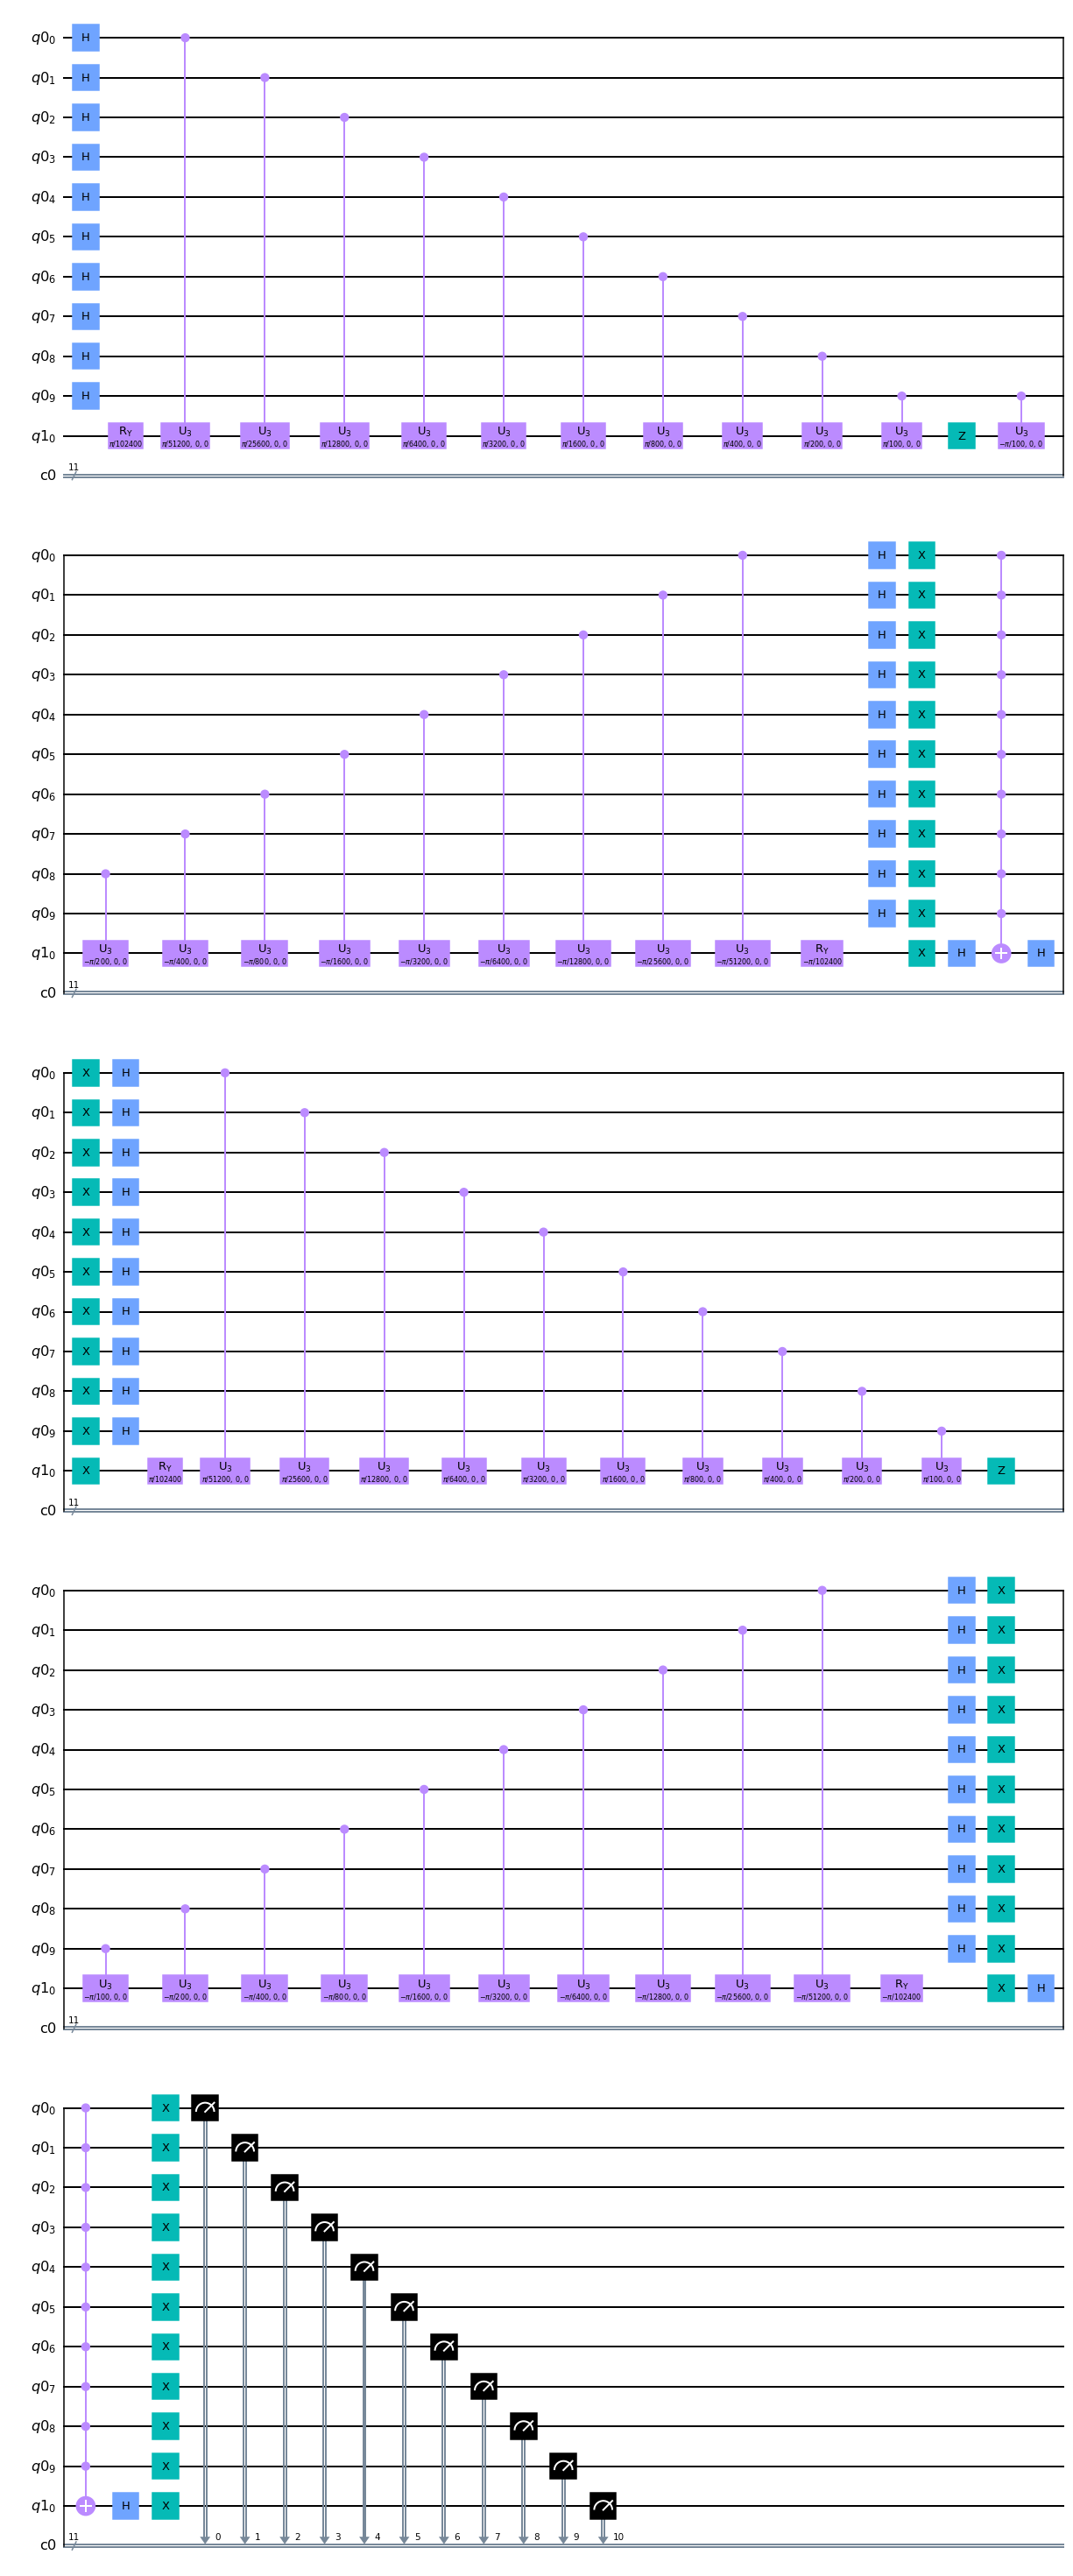

In [7]:
qc_list = create_grover_circuit([2], nbit, b_max)
my_style = {'usepiformat': True, 'cregbundle': True,'compress': True }
qc_list[0].draw(output="mpl", style=my_style, plot_barriers=False )

We also need a helper function to simultaneously run the quantum circuits that are returned by the above functions, as below. 

In [8]:
# OK
def run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=None):
    """
        Run the quantum circuits returned by create_grover_circuit()
            qc_list: list of quantum circuits
            numebr_grover_list: list of number of Grover operators
            shots_list:  list of number of shots
            backend: name of backends
        
        Return:
            hit_list: list of count of obserbving "1" for qc_list
    """
    counts_list = []
    for k in range(len(number_grover_list)):
        print(k,"th round with", number_grover_list[k],"oracles")
        job = execute(qc_list[k], backend=backend, shots=shots_list[k], noise_model=noise_model)
        lapse = 0
        interval = 0.00001
        time.sleep(interval)
        while job.status().name != 'DONE':
            time.sleep(interval)
            lapse += 1
        counts_list.append(job.result().get_counts(qc_list[k]))
    return counts_list

In [9]:
def make_hit_list(counts_list):
    hit_list = []
    for k in range(len(counts_list)):
        hits = counts_list[k].get("0"*(nbit+1), 0)
        hit_list.append(hits)
    return hit_list

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [10]:
#setting the number of shots and Grover operators.

# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [i for i in range(100)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [11]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.90, 0.10],[0.20,0.80]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [12]:
qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [13]:
counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model)  # list of number of grover operators

0 th round with 0 oracles
1 th round with 1 oracles
2 th round with 2 oracles
3 th round with 3 oracles
4 th round with 4 oracles
5 th round with 5 oracles
6 th round with 6 oracles
7 th round with 7 oracles
8 th round with 8 oracles
9 th round with 9 oracles
10 th round with 10 oracles
11 th round with 11 oracles
12 th round with 12 oracles
13 th round with 13 oracles
14 th round with 14 oracles
15 th round with 15 oracles
16 th round with 16 oracles
17 th round with 17 oracles
18 th round with 18 oracles
19 th round with 19 oracles
20 th round with 20 oracles
21 th round with 21 oracles
22 th round with 22 oracles
23 th round with 23 oracles
24 th round with 24 oracles
25 th round with 25 oracles
26 th round with 26 oracles
27 th round with 27 oracles
28 th round with 28 oracles
29 th round with 29 oracles
30 th round with 30 oracles
31 th round with 31 oracles
32 th round with 32 oracles
33 th round with 33 oracles
34 th round with 34 oracles
35 th round with 35 oracles
36 th round 

In [14]:
hit_list = make_hit_list(counts_list)
print(hit_list)

[38, 42, 29, 38, 30, 35, 27, 30, 31, 26, 28, 31, 24, 23, 22, 18, 28, 27, 16, 18, 18, 26, 15, 26, 18, 19, 11, 14, 10, 16, 16, 12, 7, 9, 9, 14, 8, 8, 3, 7, 10, 5, 8, 5, 6, 3, 7, 9, 7, 3, 3, 9, 8, 13, 7, 11, 8, 13, 12, 11, 10, 13, 16, 15, 19, 23, 16, 16, 21, 20, 22, 26, 16, 22, 28, 36, 36, 29, 33, 32, 32, 33, 32, 31, 33, 31, 28, 32, 36, 29, 26, 31, 34, 30, 29, 32, 28, 28, 35, 20]


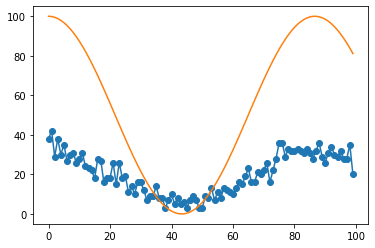

In [15]:
divide = 100
plt.plot(number_grover_list, hit_list, marker="o")
plt.plot(np.linspace(0,number_grover_list[-1], divide), 100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2)

In [16]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)
meas_filter = TensoredMitigation(nbit+1, meas_fitter.cal_matrices, mit_pattern)

In [17]:
mit_counts_list = []
for counts in counts_list:
    x_tilde = meas_filter.apply(counts, method="default")
    mit_counts_list.append(x_tilde)
mit_hit_list = make_hit_list(mit_counts_list)

x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999979
number of positive values:  1013
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000049
number of positive values:  1005
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999971
number of positive values:  1010
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.999999999999998
number of positive values:  1031
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1016
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000004
number of positive values:  1033
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999967
number of positive values:  1013
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999974
number of positive values:  1008
main

sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1029
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1028
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1033
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000044
number of positive values:  1002
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1021
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000009
number of positive values:  1025
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000016
number of positive values:  1026
main process: Done!
x + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999991
number of positive values:  1024
main p

In [19]:
x_tilde_S_list = [] # K = 0
for counts in counts_list:
    x_tilde = meas_filter.apply(counts, method="x_tilde_s")
    x_tilde_S_list.append(x_tilde)
mit_hit_S_list = make_hit_list(x_tilde_S_list)

Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.219214340189336
number of positive values:  32
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 1.913675957086494
number of positive values:  25
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.594638251925595
number of positive values:  33
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.0021916812071208
number of positive values:  22
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.308395306701338
number of positive values:  32
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.2662160889001237
number of positive values:  29
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x

sum of mitigated probability vector x_s: 3.2766038310852768
number of positive values:  41
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.9582336904006707
number of positive values:  42
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.9123447694431097
number of positive values:  41
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 2.750836607415492
number of positive values:  35
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 3.2598767325793867
number of positive values:  52
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 3.100871316608516
number of positive values:  44
main process: Done!
Restriction to labels of y + SGS algorithm
sum of mitigated probability vector x_s: 3.3258999924191164
number of positive

In [68]:
import tensor_filter
importlib.reload(tensor_filter)
from tensor_filter import *
meas_filter = TensoredMitigation(nbit+1, meas_fitter.cal_matrices, mit_pattern)

Text(0, 0.5, 'shots of $|0...0>$')

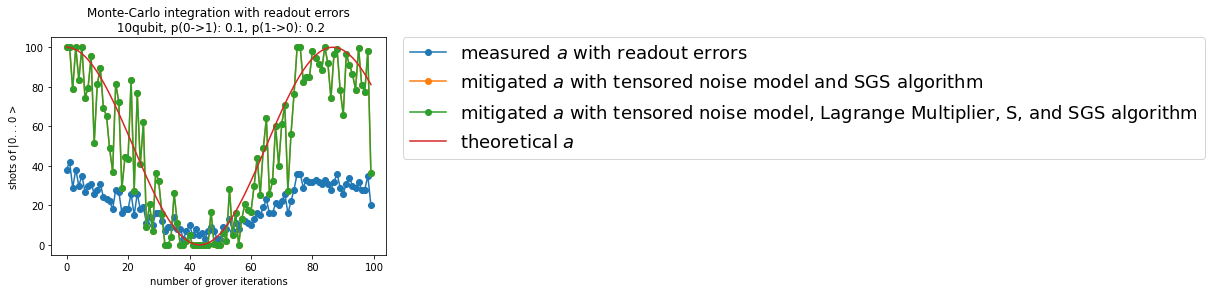

In [22]:
divide = 100
plt.plot(number_grover_list, hit_list, marker="o", label="measured $a$ with readout errors")
plt.plot(number_grover_list, mit_hit_list, marker="o", label="mitigated $a$ with tensored noise model and SGS algorithm")
plt.plot(number_grover_list, mit_hit_S_list, marker="o", label="mitigated $a$ with tensored noise model, Lagrange Multiplier, S, and SGS algorithm")
# plt.plot(number_grover_list, mit_hit_0_list, marker="o", label="mitigated $a$ with tensored noise model, Lagrange Multiplier, K=0, and SGS algorithm")
plt.plot(np.linspace(0,number_grover_list[-1], divide), 100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, label="theoretical $a$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("Monte-Carlo integration with readout errors\n 10qubit, p(0->1): 0.1, p(1->0): 0.2")
plt.xlabel("number of grover iterations")
plt.ylabel("shots of $|0...0>$")

In [44]:
meas_filter.Sigmas

[array([[1.00774917, 0.        ],
        [0.        , 0.69771826]]),
 array([[1.00959343, 0.        ],
        [0.        , 0.68749635]]),
 array([[1.01099401, 0.        ],
        [0.        , 0.68883804]]),
 array([[1.00899301, 0.        ],
        [0.        , 0.69939878]]),
 array([[1.01245105, 0.        ],
        [0.        , 0.6968894 ]]),
 array([[1.00859223, 0.        ],
        [0.        , 0.70052391]]),
 array([[1.00869667, 0.        ],
        [0.        , 0.6945215 ]]),
 array([[1.01090052, 0.        ],
        [0.        , 0.69759604]])]

In [23]:
import pickle
with open("modified_monte_carlo_readout_error_10qubits_01_02.pkl", "wb")as f:
    pickle.dump(counts_list, f)